In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
!pip install seaborn
from Utilities import *

In [2]:
df = pd.read_hdf("/storage/shared/data/2lep_df_forML_bkg_signal_fromRDF.hdf5")
df_data = pd.read_hdf("/storage/shared/data/2lep_df_forML_data_fromRDF.hdf5")
print(df.keys())

Index(['njet20', 'njet60', 'nbjet60', 'nbjet70', 'nbjet77', 'nbjet85', 'isOS',
       'isSF', 'mll', 'mt2', 'met_et', 'met_phi', 'lep1_flav', 'lep1_pt',
       'lep1_eta', 'lep1_phi', 'lep1_E', 'lep1_ptcone30', 'lep1_etcone20',
       'lep1_trackd0pvunbiased', 'lep1_tracksigd0pvunbiased', 'lep1_isTightID',
       'lep1_z0', 'lep2_flav', 'lep2_pt', 'lep2_eta', 'lep2_phi', 'lep2_E',
       'lep2_ptcone30', 'lep2_etcone20', 'lep2_trackd0pvunbiased',
       'lep2_tracksigd0pvunbiased', 'lep2_isTightID', 'lep2_z0',
       'channelNumber', 'costhstar', 'weight', 'category', 'physdescr'],
      dtype='object')


In [3]:
otherCategories = [ 'topX', 'Higgs']

for cat in otherCategories:
    df.loc[df["category"] == cat,"category"] = "Other"

df_weight = df.weight

In [4]:
#cats = ['Other' ,'Diboson' , 'ttbar', 'Zjets','topX', 'SUSYSlepSlep']
cats = ['Wjets' , 'singleTop', 'Diboson' , 'ttbar', 'Zjets', 'SUSYSlepSlep','Other']

In [5]:
df_pt1 = []
df_pt2 = []
df_mep = []
df_mll = []
df_mt2 = []
df_bTag = []
df_isOS = []
nr_events = []
weights = []

for i in range(len(cats)):
    index = df["category"] == cats[i]
    df_cat = df[index]
    weights.append(df_weight[index])
    df_pt1.append(df_cat["lep1_pt"].ravel()/1000)
    df_pt2.append(df_cat["lep2_pt"].ravel()/1000)
    df_mep.append(df_cat["met_et"].ravel()/1000)
    df_mll.append(df_cat["mll"].ravel()/1000)
    df_mt2.append(df_cat["mt2"].ravel()/1000)
    df_bTag.append(df_cat["nbjet77"].ravel())
    df_isOS.append(df_cat["isOS"].ravel())
    nr_events.append(np.sum(weights[i].array))
    
    print(f"Nr of {cats[i]} events: {nr_events[i]}")

print(sum(nr_events))
print(len(df_data))
sort_indx = sorted(range(len(nr_events)), key=lambda k: nr_events[k])


df_pt1 = [df_pt1[i] for i in sort_indx]
df_pt2 = [df_pt2[i] for i in sort_indx]
df_mep = [df_mep[i] for i in sort_indx]
df_mll = [df_mll[i] for i in sort_indx]
df_mt2 = [df_mt2[i] for i in sort_indx]
df_bTag = [df_bTag[i] for i in sort_indx]
df_isOS = [df_isOS[i] for i in sort_indx]
cats = [cats[i] for i in sort_indx]
weights = [weights[i] for i in sort_indx]


Nr of Wjets events: 302422.528424647
Nr of singleTop events: 21678.330565371998
Nr of Diboson events: 45123.47450210618
Nr of ttbar events: 210407.7031932341
Nr of Zjets events: 10160023.319746843
Nr of SUSYSlepSlep events: 8831.746888162837
Nr of Other events: 46140.30334078629
10794627.406661151
11442336


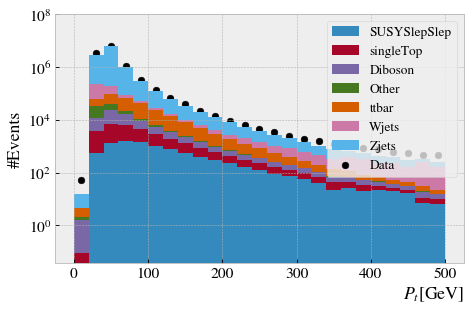

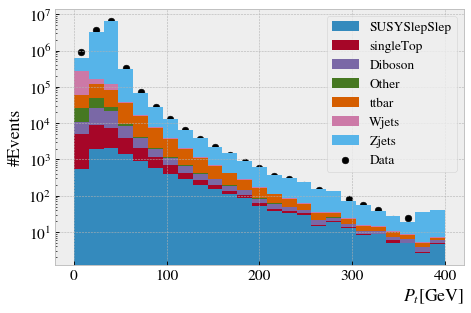

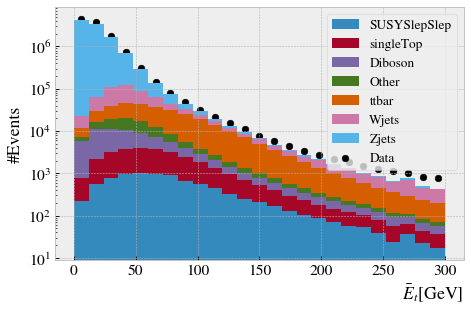

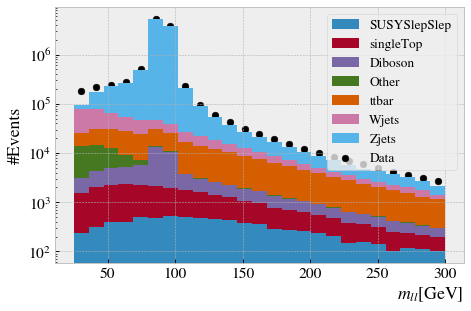

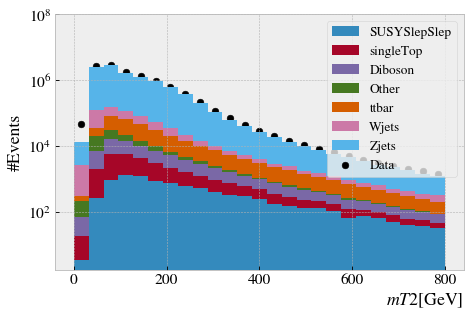

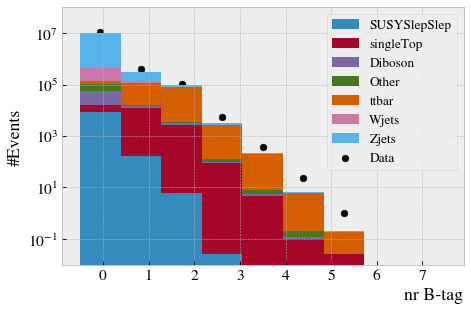

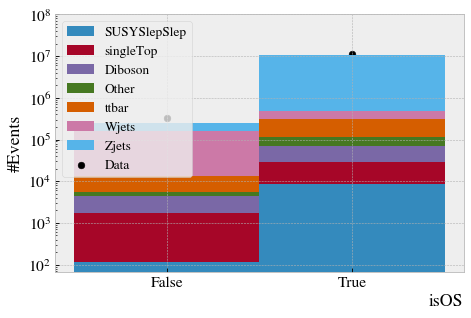

In [11]:

N, bins = np.histogram(df_data["lep1_pt"]/1000, bins = 25, range=(0,500))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
fig = plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
plt.xlabel(r"$P_t$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.yscale("log")
plt.hist(df_pt1, weights = weights, bins = 25, range=(0,500), histtype = "barstacked", stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
ax.set_ylim(top = 1e8)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/p_t1.pdf")
plt.show()


N, bins = np.histogram(df_data["lep2_pt"]/1000, bins = 25, range=(0,400))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$P_t$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_pt2, weights = weights, bins = 25, range=(0,400), stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/p_t2.pdf")
plt.show()

N, bins = np.histogram(df_data["met_et"]/1000, bins = 25, range=(0,300))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$\bar{E}_t$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_mep, weights = weights, bins = 25, range=(0,300), stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/MET.pdf")
plt.show()

N, bins = np.histogram(df_data["mll"]/1000, bins = 25, range=(25,300))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$m_{ll}$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_mll, weights = weights, bins = 25, range=(25,300), stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/mll.pdf")
plt.show()

N, bins = np.histogram(df_data["mt2"]/1000, bins = 25, range=(0,800))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$m{T2}$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_mt2, weights = weights, bins = 25, range=(0,800), stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.ylim(top = 1e8)
plt.savefig("figures/mT2.pdf")
plt.show()

N, bins = np.histogram(df_data["nbjet77"], bins = 9, range=(0,8))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2

plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xticks(np.arange(9)+0.5, labels = [f"{i}" for i in range(9)])
plt.xlabel(r"nr B-tag", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_bTag, weights = weights, bins = 9, range=(0,8), stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.ylim(top = 1e8)
plt.savefig("figures/bTag.pdf")
plt.show()


N, bins = np.histogram(df_data["isOS"], bins = 2, range=(0,1))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2

plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.xticks([0.25, 0.75], labels = ["False","True"])
plt.yscale("log")
plt.xlabel(r"isOS", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_isOS, weights = weights, bins = 2, range=(0,1), stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=12)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.ylim(top = 1e8)
plt.savefig("figures/isOS.pdf")
plt.show()

In [ ]:
import pickle
xgb = pickle.load(open("XGBoost_trained", "rb"))

## Cuts signal region

In [ ]:
#Count number of SUSY before cuts
SUSY_index = df["category"] == "SUSYSlepSlep"
SUSY_events = df[SUSY_index]
SUSY_masses = df["physdescr"][SUSY_index].unique()
SUSY_nr_events_BC = {}
for i in range(len(SUSY_masses)):
    SUSY_nr_events_BC[SUSY_masses[i]] = np.sum(df["weight"][df["physdescr"] == SUSY_masses[i]].array)

In [ ]:
df = df[((abs(df["mll"]-91.2*1000)>20*1000) & (df["nbjet77"] < 2) & (df["isOS"] == 1) & (df["mt2"] > 175*1000) & (df["met_et"] > 50*1000) & (df["lep1_pt"] > 80*1000) & (df["lep2_pt"] > 25*1000) )]
df_data = df_data[((abs(df_data["mll"]-91.2*1000)>20*1000) & (df_data["nbjet77"] < 2) & (df_data["isOS"] == 1) & (df_data["mt2"] > 175*1000) & (df_data["met_et"] > 50*1000) & (df_data["lep1_pt"] > 80*1000) & (df_data["lep2_pt"] > 25*1000) )]


df_category = df.category
df_weights = df.weight
df_physdescr = df.physdescr


for i in range(len(cats)):
    print(f"Nr of {cats[i]} events: {np.sum(df_weights[df_category == cats[i]].array)}")

In [ ]:
df.drop(['category', 'channelNumber', 'physdescr', 'weight'],axis=1,inplace=True)
df_data.drop(['channelNumber',  'weight'],axis=1,inplace=True)

In [ ]:
df_output = []
weights = []
nr_events = []

cats = ['Wjets' , 'singleTop', 'Diboson' , 'ttbar', 'Zjets', 'Other']

for i in range(len(cats)):
    index = df_category == cats[i]
    X_cat = np.array(df[index])
    weights.append(df_weights[index])
    df_output.append(xgb.predict_proba(X_cat)[:,1])
    nr_events.append(np.sum(weights[i].array))

sort_indx = sorted(range(len(nr_events)), key=lambda k: nr_events[k])

df_output = [df_output[i] for i in sort_indx]
weights = [weights[i] for i in sort_indx]
cats = [cats[i] for i in sort_indx]
nr_events = [nr_events[i] for i in sort_indx]

for i in range(len(cats)):
    print(cats[i], nr_events[i])

In [ ]:
xbg_pred_data = xgb.predict_proba(np.array(df_data))[:,1]
N, bins = np.histogram(xbg_pred_data, bins = 25, range=(0,1))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
threshold = 0.681175

In [ ]:
fig = plt.figure(figsize = (7.4, 5.8), num=0, dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
plt.xlabel(r"$XGB$-output", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.yscale("log")
plt.ylim([1e1,1e6])
plt.hist(df_output, weights = weights, bins = 25, range=(0,1), histtype = "barstacked", stacked = True, label = cats, zorder=0)
plt.scatter(x, N, c = "black", label = "Data")
plt.axvline(x=threshold, color="black", linestyle="--", linewidth = 1.0, label = "SR-threshold")
plt.legend(fontsize=13)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/XGB_dist.pdf")
plt.show()

## Compare events in the signal region

In [ ]:
n_obs_ML = np.sum(np.array(xbg_pred_data>threshold))
n_obs_nML = len(xbg_pred_data)

bkg_ML = 0
bkg_nML = 0
bkg_expt = 0

for i in range(len(df_output)):
    bkg_ML += np.sum(weights[i][df_output[i]>threshold])
    bkg_nML += np.sum(weights[i])
Limit = 175

print(f"--- SR analysis with ML ---")
print(f"n_obs: {n_obs_ML} --- ML: bkg: {int(bkg_ML)} ")
print(f"n_obs - bkg = {int(n_obs_ML-bkg_ML)}")
print("")
print(f"--- SR analysis without ML ---")
print(f"n_obs: {n_obs_nML} --- ML: bkg: {int(bkg_nML)} ")
print(f"n_obs - bkg = {int(n_obs_nML-bkg_nML)}")

In [ ]:
SUSY_index = df_category == "SUSYSlepSlep"
SUSY_events = df[SUSY_index]
SUSY_masses = df_physdescr[SUSY_index].unique()
SUSY_nr_events_AC = {}
CL_SB = []
effic = {}

In [ ]:
for i in range(len(SUSY_masses)):
    mass_index = df_physdescr == SUSY_masses[i]
    X_mass = df[mass_index]
    weight_mass = df_weights[mass_index].array
    pred = xgb.predict_proba(X_mass)[:,1]
    SUSY_nr_events_AC[SUSY_masses[i]] = np.sum(weight_mass[np.array(pred>0)])
    effic[SUSY_masses[i]] = SUSY_nr_events_AC[SUSY_masses[i]]/SUSY_nr_events_BC[SUSY_masses[i]]
    print(f"{SUSY_masses[i]}: After Cuts {int(SUSY_nr_events_AC[SUSY_masses[i]])}, eff = {effic[SUSY_masses[i]]:.2f}")

In [ ]:
M = []
LM = []
NM = []
for i in range(len(SUSY_masses)):
    string = SUSY_masses[i].split("_")
    lm, nm = string[2].split("p")[0] + "." + string[2].split("p")[1]  , string[3].split("p")[0]
    LM.append(float(lm))
    NM.append(float(nm))
    #M.append("$m_{\tilde{l}}=$"+lm )
    M.append(f"{lm} -- {nm}")


sort_indx = sorted(range(len(LM)), key=lambda k: LM[k])

M = [M[i] for i in sort_indx]
events_l = list(SUSY_nr_events_AC.values())
effic_l = list(effic.values())
effic = [effic_l[i] for i in sort_indx]
SUSY_nr_events_AC = [events_l[i] for i in sort_indx]
#print(effic)

## Result from statistical analysis with ML output

In [ ]:
nr_Events = [735.861364542073, 1309.274316089421, 199.0985150744594, 277.47292526043464, 42.94610167033714, 63.973698914326135, 12.014748578121814, 6.4085236861268555, 6.929929222203246, 7.336796352104214, 2.6567091579318562, 2.7440258628843077, 1.212852649680408, 1.2141996573295828]
ELim = [380.92254220043867, 236.93165759901567, 138.61160640327915, 107.30197071699578, 126.5380768786177, 90.02606903964926, 128.0853672690686, 90.07589130364609, 83.3364721988819, 83.41407258580404, 83.69937108407159, 81.68355412344681, 81.87072543138865, 81.02362405016217]
OLim = [355.03970579355996, 212.01436203289475, 119.4242531940077, 92.03300119660706, 109.31771978226574, 76.28234940991581, 108.67814104698304, 75.580451011026, 70.12081043590426, 69.67277799727603, 70.44133572470734, 68.36592951281314, 68.70609533210938, 68.1878875309257]
OLim_1p5 = [50.44039315727896, 30.1697194236091, 16.966570739337723, 13.075103116777367, 15.530738322775022, 10.855005560018958, 15.464938277899403, 10.772613175623992, 10.010718697280472, 9.898392369065839, 10.00758115359646, 9.712728765030507, 9.745261440188246, 9.687434389729964]
m1s = [273.4191167507194, 170.06513759146188, 100.33487195531524, 77.49586774005309, 91.18184951547467, 64.83055708256182, 92.1462430108629, 64.46607907025647, 59.642769318807595, 59.911410440292975, 60.03925474821457, 58.34539580246201, 58.49816923156386, 58.1944921923808]
m2s = [193.2576029760761, 124.07024810649727, 72.02367783699873, 56.456265638681465, 67.61103127337931, 47.149496060045145, 67.28138378570895, 47.540053743590924, 43.98313810496538, 43.60898583068923, 44.44819542863248, 42.5656183013416, 43.80684819167339, 42.75513712093266]
p1s = [273.4191167507194, 170.06513759146188, 100.33487195531524, 77.49586774005309, 91.18184951547467, 64.83055708256182, 92.1462430108629, 64.46607907025647, 59.642769318807595, 59.911410440292975, 60.03925474821457, 58.34539580246201, 58.49816923156386, 58.1944921923808]
p2s = [193.2576029760761, 124.07024810649727, 72.02367783699873, 56.456265638681465, 67.61103127337931, 47.149496060045145, 67.28138378570895, 47.540053743590924, 43.98313810496538, 43.60898583068923, 44.44819542863248, 42.5656183013416, 43.80684819167339, 42.75513712093266]

effic = [0.19711, 0.3169, 0.5408, 0.6986, 0.5924, 0.8313, 0.5862, 0.8322, 0.8995, 0.9016, 0.8956, 0.9237, 0.9171, 0.9282]

nr_Events = np.around(np.array(SUSY_nr_events_AC))/10
OLim = np.array(OLim)
ELim = np.array(ELim)
m1s = np.array(m1s)
m2s = np.array(m2s)
p1s = np.array(p1s)
p2s = np.array(p2s)

OLim = np.insert(OLim,0, OLim[0])
OLim_1p5 = np.insert(OLim_1p5,0, OLim_1p5[0])
#OLim = np.append(OLim,OLim[-1])
#OLim_1p5 = np.append(OLim_1p5,OLim_1p5[-1])
x = np.linspace(0.5,len(nr_Events)+0.5, len(OLim))

In [ ]:
fig = plt.figure(figsize = (7.4, 5.8), num=0, dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel(r"$\sigma$ [fb]", fontsize=20)
for i in range(len(nr_Events)): 
    ax.scatter(i+1, nr_Events[i], marker = "x", label = M[i], s = 100)
ax.set_yscale("log")
ax.set_ylim(top = 8e2)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.figtext(0.04, -0.02, r"$Masses$[GeV]", rotation=90, va='center', fontsize = 15)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
legend1 = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=4, fontsize=13)
plt.plot(x, OLim, "--",drawstyle='steps', c = 'k', alpha = 0.5)
plt.plot(x, OLim_1p5, "--",drawstyle='steps', c = 'y', alpha = 0.6)

plt.plot(range(1,len(nr_Events)+ 1), nr_Events, alpha = 0.4, zorder=1)
lines = ax.get_lines()
legend2 = plt.legend(lines, [r'$95\%$ Limit', r'$87\%$ Limit','Cross section of mass-pair' ], loc='upper right',fontsize=15, framealpha = 1)
ax.add_artist(legend1)
for xi in x:
    ax.axvline(xi, linestyle = "--", zorder=0, alpha = 1, c = "white")
plt.grid(False)
plt.savefig("figures/ExlusionEvents.pdf")
plt.show()